In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
import os
print(os.listdir())

['test.tsv.zip', 'lr_bow.pkl', 'tfidf_vect.pkl', 'submit.csv', 'train.tsv', 'Stumble_upon.ipynb', 'lr_tfidf.pkl', '.ipynb_checkpoints', 'train.csv', 'test.tsv', 'Untitled.ipynb', 'train.tsv.zip', 'count_vect.pkl', 'shows_dataset.csv', 'test.csv', 'Work_2']


In [131]:
train_data = pd.read_csv('train.tsv',sep='\t')
test_data = pd.read_csv('test.tsv',sep = '\t')

In [132]:
train_data.head()

,url,urlid,boilerplate,alchemy_category,alchemy_category_score,avglinksize,commonlinkratio_1,commonlinkratio_2,commonlinkratio_3,commonlinkratio_4,...,is_news,lengthyLinkDomain,linkwordscore,news_front_page,non_markup_alphanum_characters,numberOfLinks,numwords_in_url,parametrizedLinkRatio,spelling_errors_ratio,label
0,http://www.bloomberg.com/news/2010-12-23/ibm-p...,4042,"{""title"":""IBM Sees Holographic Calls Air Breat...",business,0.789131,2.055556,0.676471,0.205882,0.047059,0.023529,...,1,1,24,0,5424,170,8,0.152941,0.079130,0
1,http://www.popsci.com/technology/article/2012-...,8471,"{""title"":""The Fully Electronic Futuristic Star...",recreation,0.574147,3.677966,0.508021,0.288770,0.213904,0.144385,...,1,1,40,0,4973,187,9,0.181818,0.125448,1
2,http://www.menshealth.com/health/flu-fighting-...,1164,"{""title"":""Fruits that Fight the Flu fruits tha...",health,0.996526,2.382883,0.562016,0.321705,0.120155,0.042636,...,1,1,55,0,2240,258,11,0.166667,0.057613,1
3,http://www.dumblittleman.com/2007/12/10-foolpr...,6684,"{""title"":""10 Foolproof Tips for Better Sleep ""...",health,0.801248,1.543103,0.400000,0.100000,0.016667,0.000000,...,1,0,24,0,2737,120,5,0.041667,0.100858,1
4,http://bleacherreport.com/articles/1205138-the...,9006,"{""title"":""The 50 Coolest Jerseys You Didn t Kn...",sports,0.719157,2.676471,0.500000,0.222222,0.123457,0.043210,...,1,1,14,0,12032,162,10,0.098765,0.082569,0


In [133]:
train_data['label'].value_counts()

1    3796
0    3599
Name: label, dtype: int64

In [134]:
train_data.shape

(7395, 27)

In [135]:
train_data.columns
import json

i = json.loads(train_data['boilerplate'].values[0])

In [136]:
def final_text(data):
    j = json.loads(data)
    return j['body']

train_data['text']= train_data['boilerplate'].apply(lambda d: final_text(d))
test_data['text'] = test_data['boilerplate'].apply(lambda d: final_text(d))

In [137]:
train_data['text'].shape

(7395,)

In [139]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
from nltk.stem import PorterStemmer

from sklearn.manifold import TSNE

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yatharth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [140]:
#To get the results in 4 decimal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    # specific
    x = re.sub(r"won't", "will not", x)
    x = re.sub(r"can\'t", "can not", x)

    # general
    x = re.sub(r"n\'t", " not", x)
    x = re.sub(r"\'re", " are", x)
    x = re.sub(r"\'s", " is", x)
    x = re.sub(r"\'d", " would", x)
    x = re.sub(r"\'ll", " will", x)
    x = re.sub(r"\'t", " not", x)
    x = re.sub(r"\'ve", " have", x)
    x = re.sub(r"\'m", " am", x)
    x = re.sub(r"http\S+", "", x)
    #x = BeautifulSoup(x, 'lxml').get_text()
    
    x = re.sub("\S*\d\S*", "", x).strip()
    x = re.sub('[^A-Za-z]+', ' ', x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    return x
    

In [141]:
train_data['cleaned_text'] = train_data['text'].apply(lambda d: preprocess(d))
test_data['cleaned_text'] = test_data['text'].apply(lambda d: preprocess(d))
target = train_data['label']

# VECTORIZATION OF TEXT DATA:
__BAG OF WORDS__

__TFIDF__

__W2V__

In [142]:
from sklearn.model_selection import train_test_split
from joblib import dump,load

In [143]:
X_train,X_cv,Y_train,Y_cv = train_test_split(train_data['cleaned_text'],target,stratify=target,test_size=0.2)

In [144]:
print("Shape of train data after splitting is:",Y_train.shape)
print("Shape of cross validation data after splitting is:",Y_cv.shape)

Shape of train data after splitting is: (5916,)
Shape of cross validation data after splitting is: (1479,)


In [16]:

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

In [17]:
#BoW
count_vect = CountVectorizer(ngram_range = (1,2),min_df = 5) #in scikit-learn
count_vect.fit(X_train)
print("some feature names ", count_vect.get_feature_names()[:10])
print('='*50)

train_vect = count_vect.transform(X_train)
cv_vect = count_vect.transform(X_cv)
print("the type of count vectorizer ",type(train_vect))
print("the shape of out train BOW vectorizer ",train_vect.get_shape())
print("the shape of Cross validation BOW vectorizer ",cv_vect.get_shape())
print("the number of unique words ", train_vect.get_shape()[1])

some feature names  ['aa', 'aaa', 'aaron', 'aaron rodgers', 'ab', 'ab exercises', 'abandon', 'abandoned', 'abbey', 'abbr']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out train BOW vectorizer  (5916, 71896)
the shape of Cross validation BOW vectorizer  (1479, 71896)
the number of unique words  71896


In [18]:
dump(count_vect,'count_vect.pkl')

['count_vect.pkl']

In [19]:
#tfidf
vect = TfidfVectorizer(ngram_range = (1,3),min_df = 5)#this ensures that  word which is occuring less than 10 times gets discarded

vect.fit(X_train)#vectorizer reading and forming all the vocabalury from training dataset

train_set_tfidf = vect.transform(X_train)
cv_set_tfidf = vect.transform(X_cv)
#transforming the data after learning the vocabalury this creates sparse matrices

print('After Vectorization:')
print('\nsize of training dataset is {}'.format(train_set_tfidf.shape))
print("size of test dataset is {}".format(cv_set_tfidf.shape))

After Vectorization:

size of training dataset is (5916, 100168)
size of test dataset is (1479, 100168)


In [20]:
dump(vect,'tfidf_vect.pkl')

['tfidf_vect.pkl']

# TSNE

In [147]:
t = TfidfVectorizer(ngram_range=(1,1), min_df=100)
t.fit(X_train)
print("some sample features(unique words in the corpus)",t.get_feature_names()[0:10])
print('='*50)

final_tf_idf = t.transform(X_train)
final_tf_idf.get_shape()

some sample features(unique words in the corpus) ['ability', 'able', 'about', 'above', 'absolutely', 'access', 'according', 'account', 'achieve', 'acid']


(5916, 1884)

In [148]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler #in scikit learn
dense_mat = final_tf_idf.todense() #converting sparse matrix to dense matrix
std_data = StandardScaler().fit_transform(dense_mat)
print(std_data.shape)


(5916, 1884)


In [149]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(std_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5916 samples in 1.307s...
[t-SNE] Computed neighbors for 5916 samples in 123.173s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5916
[t-SNE] Computed conditional probabilities for sample 2000 / 5916
[t-SNE] Computed conditional probabilities for sample 3000 / 5916
[t-SNE] Computed conditional probabilities for sample 4000 / 5916
[t-SNE] Computed conditional probabilities for sample 5000 / 5916
[t-SNE] Computed conditional probabilities for sample 5916 / 5916
[t-SNE] Mean sigma: 0.000000
[t-SNE] Computed conditional probabilities in 0.892s
[t-SNE] Iteration 50: error = 85.3169556, gradient norm = 0.3020564 (50 iterations in 4.093s)
[t-SNE] Iteration 100: error = 84.4629364, gradient norm = 0.2638540 (50 iterations in 2.192s)
[t-SNE] Iteration 150: error = 82.0030136, gradient norm = 0.2537084 (50 iterations in 2.072s)
[t-SNE] Iteration 200: error = 81.6008759, gradient norm = 0.2449935 (50 iterations in 1.956s)


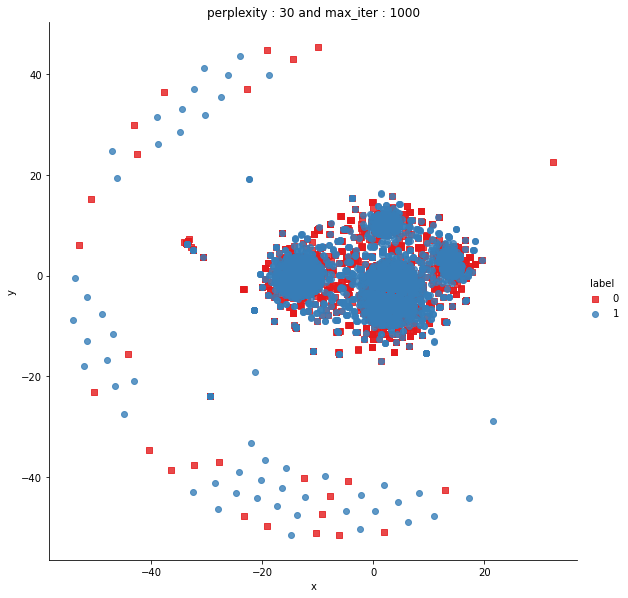

In [153]:
df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(30, 1000))
plt.show()

# LOGISTIC REGRESSION 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
warnings.filterwarnings("ignore")
import datetime as dt
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [43]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
  
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row

    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss on Test Data using Random Model 0.8699349640909391


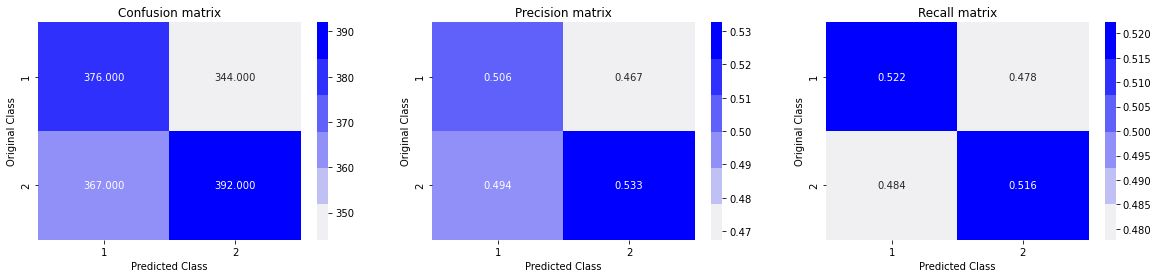

In [31]:
# we need to generate 2 numbers and the sum of numbers should be 1
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((len(Y_cv),2))
for i in range(len(Y_cv)):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(Y_cv, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(Y_cv, predicted_y)

In [44]:
"""This function takes in input the list of values of alpha to be tuned

    and training and cross validation dataset and returns the list with cross validation error for every alpha"""

def classifier(alpha,train,Y_train,cv,Y_cv):
    log_error_cv = []#list for apending losses
    log_error_tr = []#list for appending training loss

    for i in alpha:
        clf = SGDClassifier(alpha = i,penalty= 'l2',loss = 'log',random_state = 42)#the logestic regression classifier
        clf.fit(train,Y_train)

    #building the calbirated classifier for exact probabilitiies
        sig_clf = CalibratedClassifierCV(clf,method = 'sigmoid')
        sig_clf.fit(train,Y_train)
        predict_cv = sig_clf.predict_proba(cv)
        predict_tr = sig_clf.predict_proba(train)

    #computing the loss
        loss_tr = log_loss(Y_train,predict_tr,labels =clf.classes_,eps = 1e-15)#loss on training data
        loss_cv = log_loss(Y_cv,predict_cv,labels = clf.classes_,eps = 1e-15)#loss on cross validation data
        log_error_cv.append(loss_cv)
        log_error_tr.append(loss_tr)
        print('for values of alpha  = ',i,'The log loss for cross validation data is',loss_cv)

    #plotting the results
    plt.figure(figsize = (12,6))
    plt.plot(alpha,log_error_tr,'r',label = 'Training ')
    plt.plot(alpha,log_error_cv,'g',label = 'Cross Validation')
    plt.xscale('log')
    plt.grid()
    plt.title("Error for each alpha")
    plt.xlabel("log of alpha's")
    plt.ylabel("Error measure")
    plt.legend(loc = 'best')
    plt.show()

    return log_error_cv #function will return cross validation error


for values of alpha  =  1e-07 The log loss for cross validation data is 0.6927995166766796
for values of alpha  =  1e-06 The log loss for cross validation data is 0.6927995166766796
for values of alpha  =  1e-05 The log loss for cross validation data is 0.549495820710817
for values of alpha  =  0.0001 The log loss for cross validation data is 0.5436706703964025
for values of alpha  =  0.001 The log loss for cross validation data is 0.5442516574512999
for values of alpha  =  0.01 The log loss for cross validation data is 0.5346303479150628
for values of alpha  =  0.1 The log loss for cross validation data is 0.5099436889062028
for values of alpha  =  1 The log loss for cross validation data is 0.5133136095567901
for values of alpha  =  10 The log loss for cross validation data is 0.5352422431496675
for values of alpha  =  100 The log loss for cross validation data is 0.6042760462554281
for values of alpha  =  1000 The log loss for cross validation data is 0.6738274995662866
for values o

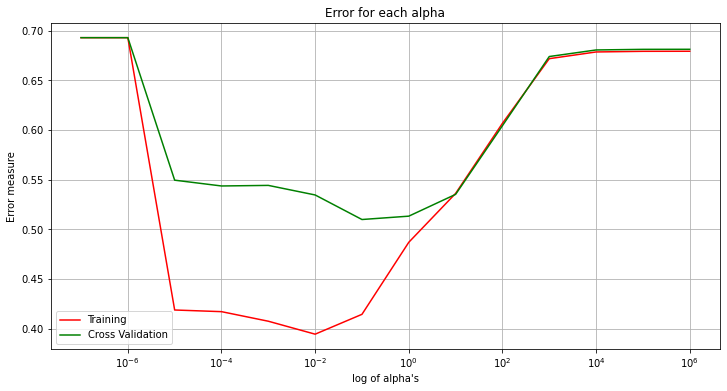

In [36]:
alpha = [10 ** x for x in range(-7, 7)] # hyperparam for SGD classifier.
lreg_cv_error = classifier(alpha,train_vect,Y_train,cv_vect,Y_cv)


For values of best alpha =  0.1 The train log loss is: 0.4146014688853763
For values of best alpha =  0.1 The cross validation log loss is: 0.5099436889062028
Total number of data points : 1479


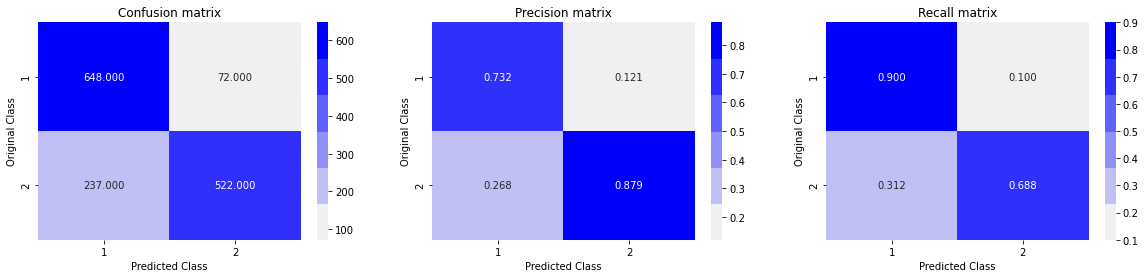

In [38]:
#funtion for computing the best values on test data

best_alpha = np.argmin(lreg_cv_error)#best value of the hyperparameter
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_vect,Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_vect,Y_train)
 #=================================================================
predict_y = sig_clf.predict_proba(train_vect)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_vect)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
#======================================================================
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_cv, predicted_y)


In [39]:
dump(sig_clf,'lr_bow.pkl')

['lr_bow.pkl']

## Logistic regression with TFIDF 

for values of alpha  =  1e-07 The log loss for cross validation data is 0.4887902971456115
for values of alpha  =  1e-06 The log loss for cross validation data is 0.4693288701350516
for values of alpha  =  1e-05 The log loss for cross validation data is 0.45797266008729914
for values of alpha  =  0.0001 The log loss for cross validation data is 0.4463038952178754
for values of alpha  =  0.001 The log loss for cross validation data is 0.4606216677713959
for values of alpha  =  0.01 The log loss for cross validation data is 0.49172080546962343
for values of alpha  =  0.1 The log loss for cross validation data is 0.5263758801249484
for values of alpha  =  1 The log loss for cross validation data is 0.5368355155103378
for values of alpha  =  10 The log loss for cross validation data is 0.5387282783839835
for values of alpha  =  100 The log loss for cross validation data is 0.5391580515935441
for values of alpha  =  1000 The log loss for cross validation data is 0.5393149036539017
for value

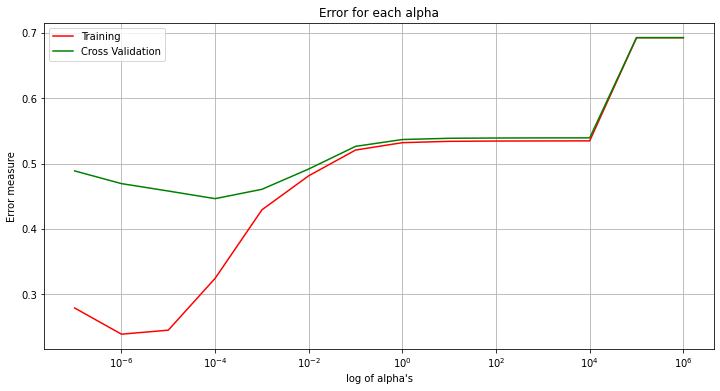

In [45]:
alpha = [10 ** x for x in range(-7, 7)] # hyperparam for SGD classifier.
lreg_cv_error = classifier(alpha,train_set_tfidf,Y_train,cv_set_tfidf,Y_cv)


For values of best alpha =  0.0001 The train log loss is: 0.3242582360181614
For values of best alpha =  0.0001 The cross validation log loss is: 0.4463038952178754
Total number of data points : 1479


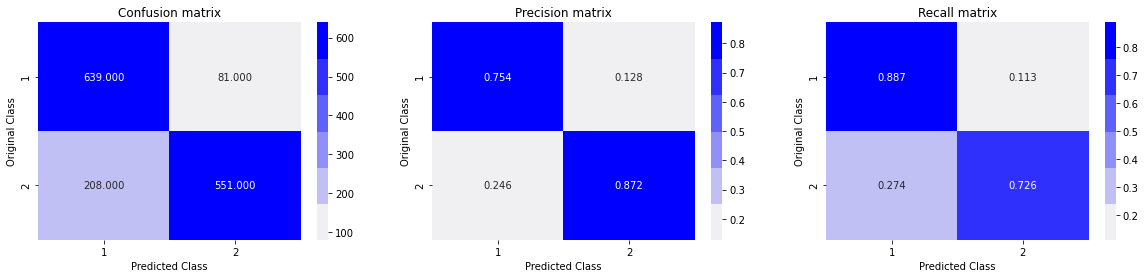

In [47]:
#funtion for computing the best values on test data

best_alpha = np.argmin(lreg_cv_error)#best value of the hyperparameter
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_set_tfidf,Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_set_tfidf,Y_train)
 #=================================================================
predict_y = sig_clf.predict_proba(train_set_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(Y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_set_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(Y_cv, predict_y, labels=clf.classes_, eps=1e-15))
#======================================================================
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(Y_cv, predicted_y)


In [ ]:
dump(sig_clf,'lr_tfidf.pkl')

# BERT

__Prepraing the dataset for a pre trained transformer mode__

In [102]:
train_data.to_csv('train.csv')
test_data.to_csv('test.csv')

In [94]:
X_train,X_cv,Y_train,Y_cv = train_test_split(train_data,train_data['label'],stratify=target,test_size=0.2)

In [95]:
X_train.to_csv('train.csv')

(5916, 29)

In [103]:
X_train = train_data
X_test = test_data

In [49]:
from transformers import AutoTokenizer, TFAutoModel


#Downloading the tokenizer and the Albert model for fine tuning

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert=TFAutoModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [104]:
#ADD all the variable for the Transformer model 

SEQ_length=512

#Lets create the X and Y matrix from the Df train set 

Xids=np.zeros((X_train.shape[0],SEQ_length))
Xmask=np.zeros((X_train.shape[0],SEQ_length))
y=np.zeros((X_train.shape[0],1))

#Preparing the test dataframe

Xids_test=np.zeros((X_test.shape[0],SEQ_length))
Xmask_test=np.zeros((X_test.shape[0],SEQ_length))

In [105]:
y.shape
X_train.shape

(7395, 29)

In [106]:
for i,sequence in enumerate(X_train['cleaned_text']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids[i,:],Xmask[i,:],y[i,0]=tokens['input_ids'],tokens['attention_mask'],X_train['label'].values[i]


In [107]:
for i,sequence in enumerate(X_test['cleaned_text']):
    tokens=tokenizer.encode_plus(sequence,max_length=SEQ_length,padding='max_length',add_special_tokens=True,
                           truncation=True,return_token_type_ids=False,return_attention_mask=True,
                           return_tensors='tf')
    
    Xids_test[i,:],Xmask_test[i,:]=tokens['input_ids'],tokens['attention_mask']

In [108]:
#Check if the GPU is avalaible
import tensorflow as tf 
tf.config.get_visible_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [109]:
dataset=tf.data.Dataset.from_tensor_slices((Xids,Xmask,y))

def map_func(input_ids,mask,labels):
    return {'input_ids':input_ids,'attention_mask':mask},labels

dataset=dataset.map(map_func)
dataset=dataset.shuffle(100000).batch(32).prefetch(1000)

DS_size=len(list(dataset))

train=dataset.take(round(DS_size*0.85))
val=dataset.skip(round(DS_size*0.85))

In [110]:
#Preparing the test dataset

dataset_test=tf.data.Dataset.from_tensor_slices((Xids_test,Xmask_test))

def map_func(input_ids,mask):
    return {'input_ids':input_ids,'attention_mask':mask}

dataset_test=dataset_test.map(map_func)
dataset_test=dataset_test.batch(32).prefetch(1000)

In [111]:
input_ids=tf.keras.layers.Input(shape=(SEQ_length,),name='input_ids',dtype='int32')
input_mask=tf.keras.layers.Input(shape=(SEQ_length,),name='attention_mask',dtype='int32')

embedding=bert(input_ids,attention_mask=input_mask)[0]
#x=tf.keras.layers.GlobalMaxPool1D()(embedding)
x=tf.keras.layers.GlobalAveragePooling1D()(embedding)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
output=tf.keras.layers.Dense(1,activation='sigmoid')(x)


model=tf.keras.Model(inputs=[input_ids,input_mask],outputs=output)

model.layers[2].trainable=False

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [112]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_bert_model (TFBertModel)     TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
global_average_pooling1d (Globa (None, 768)          0           tf_bert_model[0][0]          

In [116]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer='adam',metrics=[tf.keras.metrics.AUC()])
import warnings
warnings.filterwarnings('ignore')

## Getting the predictions on test data 

In [118]:
test_tfidf = load('tfidf_vect.pkl')

In [119]:
model = load('lr_tfidf.pkl')

In [120]:
test = test_tfidf.transform(test_data['cleaned_text'])

In [121]:
predictions = model.predict(test)

In [123]:
test_data['label'] = predictions

In [127]:
test_data[['urlid','label']].to_csv('submit.csv')